In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
x_data = np.random.uniform(-1,1,[500,2])

y_data = [[0] if x_data[i][0]*x_data[i][1] >= 0. else [1] for i in range(len(x_data))]


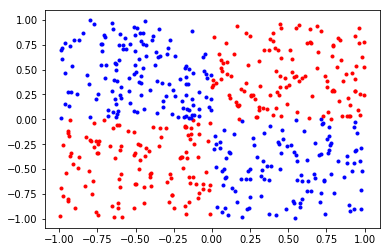

In [3]:
for i, j in enumerate(y_data):
    if j == [0] : 
        _ = plt.plot(x_data[i][0], x_data[i][1], "r.")
    else :
        _ = plt.plot(x_data[i][0], x_data[i][1], "b.")

In [4]:
X = tf.placeholder(tf.float32, shape=[None,2])
Y = tf.placeholder(tf.float32, shape=[None,1])

W0 = tf.Variable(tf.random_normal([2,2]), dtype=tf.float32)
b0 = tf.Variable(tf.random_normal([2]), dtype=tf.float32)

H0 = tf.nn.sigmoid(tf.matmul(X,W0)+b0)

W1 = tf.Variable(tf.random_normal([2,1]), dtype=tf.float32)
b1 = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

H = tf.sigmoid(tf.matmul(H0,W1)+b1)

loss = - tf.reduce_mean(Y * tf.log(H) + (1 - Y) * tf.log(1 - H))
train = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(loss)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(H > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

Step : 100, Cost : 0.688395  Accuracy : 0.628
Step : 200, Cost : 0.685549  Accuracy : 0.654
Step : 300, Cost : 0.679585  Accuracy : 0.672
Step : 400, Cost : 0.669005  Accuracy : 0.67
Step : 500, Cost : 0.654213  Accuracy : 0.664
Step : 600, Cost : 0.637219  Accuracy : 0.67
Step : 700, Cost : 0.618542  Accuracy : 0.672
Step : 800, Cost : 0.598255  Accuracy : 0.658
Step : 900, Cost : 0.578238  Accuracy : 0.66
Step : 1000, Cost : 0.559969  Accuracy : 0.662


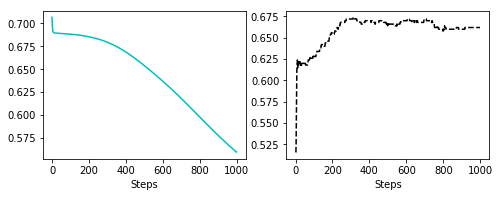

In [5]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

cost_list = []
acc_list = []

iteration = 1000
for step in range(iteration):
    acc, cost, _, = sess.run([accuracy, loss,  train,], feed_dict={X: x_data, Y: y_data})
    cost_list.append(cost)
    acc_list.append(acc)
    if (step+1) % (iteration//10) ==0:
        print("Step : %i, Cost : %s  Accuracy : %s" %(step+1, cost, acc)) 

plt.figure(figsize=(8,6))     
plt.subplot(221)
plt.xlabel("Steps")
_ = plt.plot(cost_list, "c")
plt.subplot(222)
plt.xlabel("Steps")
_ = plt.plot(acc_list, "k--")